**Business Objective**: To build a model that enables a passenger to predict whether his flight will be delayed, and apply various models to increase the performance of the model. 

**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Reading the dataset**

In [3]:
df=pd.read_csv('flight-data.csv')

***Displaying the head of the dataframe***

In [4]:
df.head()

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,...,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,...,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0


In [5]:
#Listing all the columns in the dataframe
df.columns

Index(['carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time',
       'distance', 'hour', 'minute', 'temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'type',
       'manufacturer', 'model', 'engines', 'seats', 'engine', 'arr_delay'],
      dtype='object')

In [6]:
#Shape of the dataframe
print(df.shape)
print("Number of rows in the dataframe:", df.shape[0])
print("Number of columns in the dataframe:", df.shape[1])

(10000, 25)
Number of rows in the dataframe: 10000
Number of columns in the dataframe: 25


In [7]:
#Displaying column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

In [8]:
#Displaying summary of numerical columns
df.describe()

,flight,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,engines,seats,arr_delay
count,10000.000000,9716.000000,10000.000000,10000.000000,10000.000000,9952.000000,9952.000000,9952.000000,9731.000000,9951.000000,2387.00000,9954.000000,8808.000000,9954.000000,8499.000000,8499.000000,9716.000000
mean,1993.785200,149.771099,1033.036700,13.185300,26.405800,56.885289,41.578652,59.699401,199.824273,11.082228,25.29643,0.004574,1017.805722,9.237887,1.993293,135.897870,0.410045
std,1637.565161,92.714630,722.747763,4.691094,19.286677,17.967138,19.360524,19.713338,106.234823,5.635370,6.14381,0.033679,7.545151,2.043394,0.097400,72.402517,0.491867
min,1.000000,21.000000,80.000000,5.000000,0.000000,10.940000,-9.040000,12.740000,0.000000,0.000000,16.11092,0.000000,985.000000,0.060000,1.000000,2.000000,0.000000
25%,580.750000,81.000000,502.000000,9.000000,9.000000,42.080000,26.060000,43.920000,120.000000,6.904680,20.71404,0.000000,1012.700000,10.000000,2.000000,55.000000,0.000000
50%,1511.000000,130.000000,872.000000,13.000000,29.000000,57.020000,42.800000,57.990000,220.000000,10.357020,24.16638,0.000000,1017.500000,10.000000,2.000000,149.000000,0.000000
75%,3514.250000,191.000000,1389.000000,17.000000,45.000000,71.960000,57.920000,75.690000,290.000000,14.960140,28.76950,0.000000,1022.700000,10.000000,2.000000,189.000000,1.000000
max,6181.000000,648.000000,4983.000000,23.000000,59.000000,100.040000,78.080000,100.000000,360.000000,42.578860,66.74524,1.210000,1042.100000,10.000000,4.000000,400.000000,1.000000


In [9]:
#Displaying the description of all columns
df.describe(include = 'all')

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
count,10000,10000.000000,9926,10000,10000,9716.000000,10000.000000,10000.000000,10000.000000,9952.000000,...,9954.000000,8808.000000,9954.000000,8499,8499,8499,8499.000000,8499.000000,8499,9716.000000
unique,16,NaN,2795,3,101,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,28,86,NaN,NaN,6,NaN
top,UA,NaN,N725MQ,EWR,ATL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Fixed wing multi engine,BOEING,A320-232,NaN,NaN,Turbo-fan,NaN
freq,1729,NaN,20,3570,518,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8432,2451,1356,NaN,NaN,7208,NaN
mean,NaN,1993.785200,NaN,NaN,NaN,149.771099,1033.036700,13.185300,26.405800,56.885289,...,0.004574,1017.805722,9.237887,NaN,NaN,NaN,1.993293,135.897870,NaN,0.410045
std,NaN,1637.565161,NaN,NaN,NaN,92.714630,722.747763,4.691094,19.286677,17.967138,...,0.033679,7.545151,2.043394,NaN,NaN,NaN,0.097400,72.402517,NaN,0.491867
min,NaN,1.000000,NaN,NaN,NaN,21.000000,80.000000,5.000000,0.000000,10.940000,...,0.000000,985.000000,0.060000,NaN,NaN,NaN,1.000000,2.000000,NaN,0.000000
25%,NaN,580.750000,NaN,NaN,NaN,81.000000,502.000000,9.000000,9.000000,42.080000,...,0.000000,1012.700000,10.000000,NaN,NaN,NaN,2.000000,55.000000,NaN,0.000000
50%,NaN,1511.000000,NaN,NaN,NaN,130.000000,872.000000,13.000000,29.000000,57.020000,...,0.000000,1017.500000,10.000000,NaN,NaN,NaN,2.000000,149.000000,NaN,0.000000
75%,NaN,3514.250000,NaN,NaN,NaN,191.000000,1389.000000,17.000000,45.000000,71.960000,...,0.000000,1022.700000,10.000000,NaN,NaN,NaN,2.000000,189.000000,NaN,1.000000


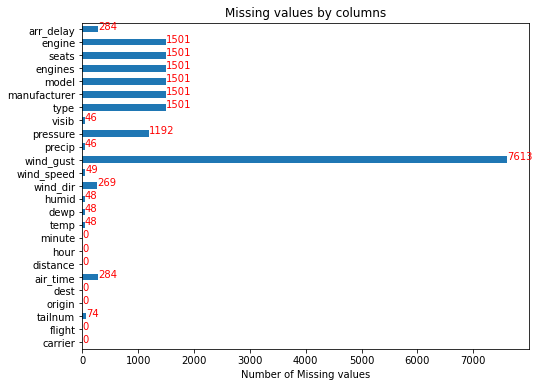

In [10]:
#Displaying the missing values in each column
plt.rcParams["figure.figsize"] = (8,6)
df.isnull().sum().plot.barh()
plt.xlabel('Number of Missing values')
plt.title("Missing values by columns")
for i, v in enumerate(df.isnull().sum()):
    plt.text(v +1, i , str(v), color='red')

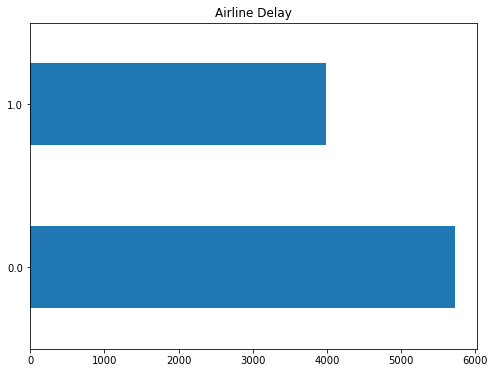

In [11]:
#Displaying the distrubution of arrival delay of airlines
df.arr_delay.value_counts().plot.barh()
plt.title('Airline Delay')
plt.show()

> Inferences:

It can be seen that the dataset is partially balanaced as it contains the good number of delayed or non-delayed instances.

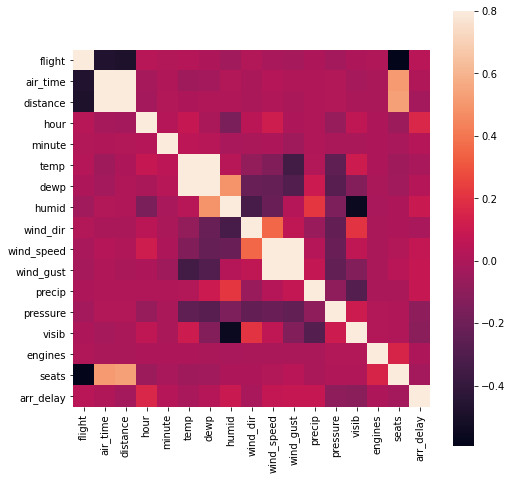

In [12]:
#Plotting the correlation matrix of all the features
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

> Inferences:
It is observed that, some of the features are highly coorelated like air_time and distance.

In [13]:
#Creating the dataframe with all the necessary features that are known to the user when predicting the flight delay 
df1=df[['air_time','distance','temp','pressure','visib','engines','manufacturer','origin','dest','arr_delay']]

In [14]:
#Displaying the head of the dataframe
df1.head()

,air_time,distance,temp,pressure,visib,engines,manufacturer,origin,dest,arr_delay
0,135.0,1069,73.04,1019.4,10.0,2.0,AIRBUS,JFK,FLL,1.0
1,287.0,2248,71.06,1020.4,10.0,2.0,BOEING,JFK,LAS,0.0
2,84.0,594,78.80,NaN,5.0,2.0,EMBRAER,EWR,GSP,1.0
3,305.0,2153,44.06,1009.2,10.0,NaN,NaN,JFK,PHX,1.0
4,78.0,544,69.98,1021.3,10.0,2.0,AIRBUS INDUSTRIE,LGA,CLT,0.0


In [15]:
#Displaying the data types of all the features
df1.dtypes

air_time        float64
distance          int64
temp            float64
pressure        float64
visib           float64
engines         float64
manufacturer     object
origin           object
dest             object
arr_delay       float64
dtype: object

> Inferences:
It can be seen that there are only two data types i.e., numerical and categorical 

**Imputation of Missing Values**

In [52]:
#Imputimg the numerical columns using median
df1=df1.fillna(df1.median())

In [54]:
#Filling the categorical column with most frequent value in the dataframe
df1=df1.fillna(df1['manufacturer'].value_counts().index[0])

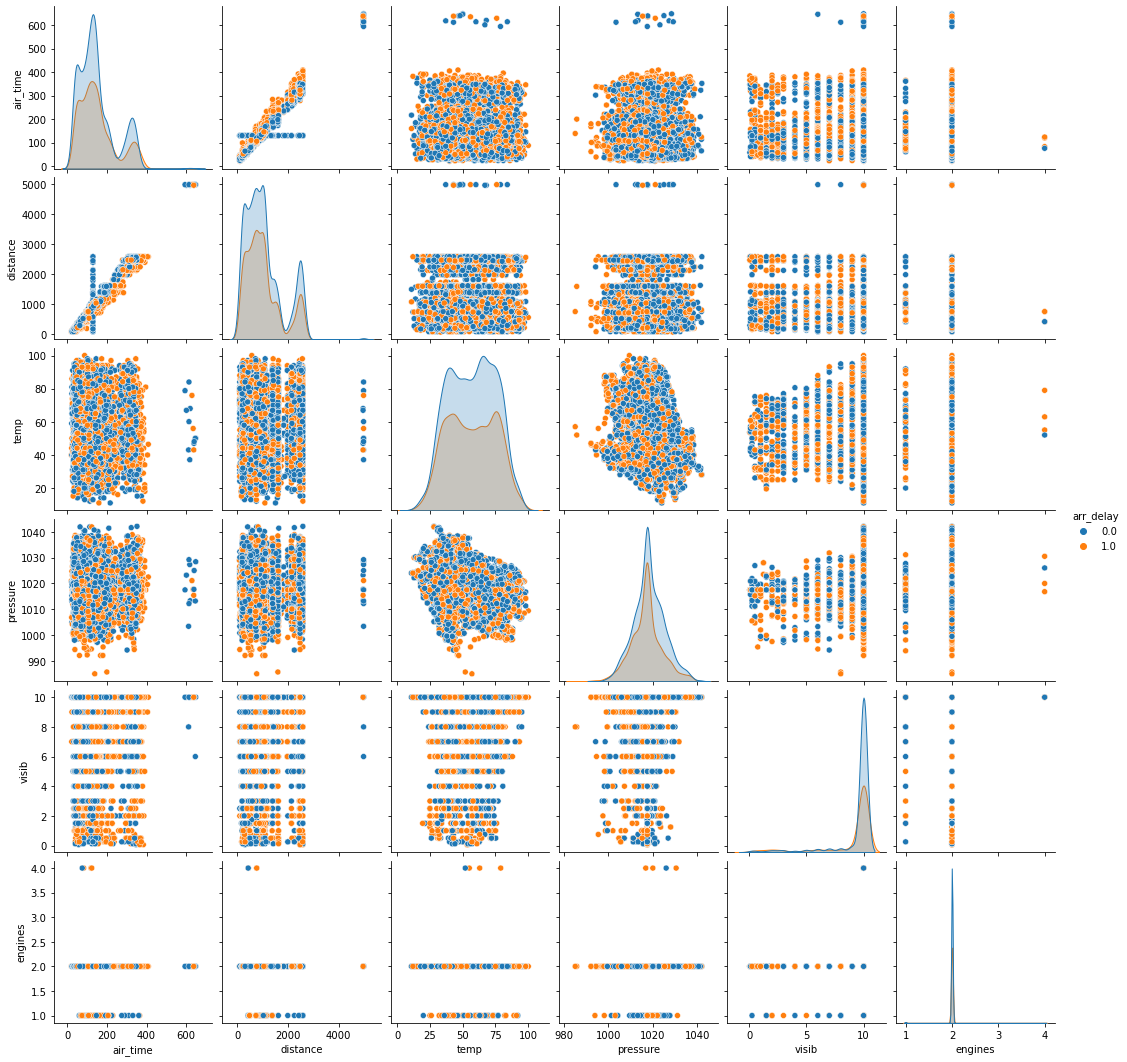

In [18]:
#Plotting the correlation between all the columns
sns.pairplot(df1,hue='arr_delay')

In [19]:
#Creating the list of categorical columns and the numerical columns
nums = df1.dtypes[df1.dtypes != 'object'].index.tolist()
nums = [x for x in nums if x not in ['arr_delay']]
cats = df1.dtypes[df1.dtypes == 'object'].index.tolist()

In [20]:
#Determining target variable and feature columns
x = [x for x in df1.columns if x != 'arr_delay']
X=df[x]
y= df1['arr_delay']

***Splittting the data into training and test data***

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,000
Test samples: 3,000


***Creating the pipeline***

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=np.nan,strategy='median')),
                           ('standardize_num', StandardScaler())])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, nums),
                                                      ('create_dummies', cat_pipeline, cats)])

***Logistic Regression***

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('lr', LogisticRegression())])
lr = modeling_pipeline.fit(X_train, y_train)

In [25]:
predictions=lr.predict(X_test)
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Test score: 65.27%


>Inferences:
Here, in this case the mean accuracy score is 65.27%. In this type of calssification problems the accuracy score
is should be calculated by using ROC AUC score.

>ROC AUC curve shows how likely the flight will be delayed.

In [26]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)

In [27]:
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.6732892474081426


> Inferences:
The model is predicting 67% of the instances correctly.

***Logistic Regression using Grid Serch Cross-Validatin***

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_lr = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10]}

lr = GridSearchCV(p_lr, param_grid=params, cv=10, scoring='roc_auc', refit=True)
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)

print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Validation score: 65.38%
Test score: 67.25%


>Inferences:
The scores of the model are around 66%

In [30]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.6724802811544628


>Inferences:
The ROC AUC score for the model is 67%. That means our model is able to predict 66% of the instances correctly when developed the model with various regularization strengths.

***Prediction uisng Decision Tree***

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_dt = Pipeline([('processing', processing_pipeline),('dt', DecisionTreeClassifier())])
params = {'dt__max_depth': [1, 5, 10, 15, 25],'dt__min_samples_split': [3, 10, 15]}

dt = GridSearchCV(p_dt, param_grid=params, cv=10, scoring='roc_auc', refit=True)
dt = dt.fit(X_train, y_train)
dt_p = dt.predict(X_test)

print(f'Validation score: {dt.best_score_:.2%}')
print(f'accuracy score: {accuracy_score(dt_p, y_test):.2%}')

Validation score: 61.29%
accuracy score: 64.40%


In [33]:
probabilities = dt.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.6282678133196645


>Inferences:
The score is 63%, which is less than that of the logistic regression

***Prediction using SVM grid search***

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC())])
param_grid = {'clf__C': [0.1, 1, 10, 100, 1000],'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],'clf__kernel': ['rbf']}
 
svm = GridSearchCV(p_svm, param_grid, refit = True, verbose = 3,n_jobs=-1)
 


In [35]:
# fitting the model for grid search
svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.7min finished


GridSearchCV(estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('proc_numeric',
                                                                         Pipeline(steps=[('impute_missing',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize_num',
                                                                                          StandardScaler())]),
                                                                         ['air_time',
                                                                          'distance',
                                                                          'temp',
                                                                          'pressure',
                                                                

In [36]:
svm_p = dt.predict(X_test)

print(f'Validation score: {svm.best_score_:.2%}')
print(f'accuracy score: {accuracy_score(svm_p, y_test):.2%}')

Validation score: 63.76%
accuracy score: 64.40%


>Inferences:
The accuracy scores are around 64% with the SVM model

***Ensemble Model***

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
models = list()

In [40]:
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC(probability=True))])
models.append(('logistic_regression',p_lr))
models.append(('decison_tree',p_dt))
models.append(('svm',p_svm))

In [43]:
ensemble=VotingClassifier(estimators=models,voting='soft')

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores=cross_val_score(estimator=ensemble, X=X_train, y=y_train, cv=cv, scoring='roc_auc',n_jobs=-1)

In [45]:
print(f'accuracy {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

accuracy 0.64 (+/- 0.02) [Ensemble]


>Inferences:
The ROC AUC score is 64% for Ensemble model

***AdaBoost Model***

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pp = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__max_depth': [1,2],'n_estimators': [50, 100, 200, 400]}
ABC = AdaBoostClassifier(DecisionTreeClassifier())
ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='roc_auc')
ad_gscv = ad_gscv.fit(pp, y_train)
print(f'Validation score: {ad_gscv.best_score_:.2%}')
xtt = processing_pipeline.transform(X_test)
ad_pred = ad_gscv.predict(xtt)
print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 67.90%
Test score: 69.34%


>Inferences:

The ROC AUC scores for thsi model is 69%, which is higher than all the models discussed above.

Adaptive Boosting model has improved the score comparatively but it didn't impact significantly.

